# TASK-1: PREDICTION USING SUPERVISED ML
## by Arunava Das

### OBJECTIVE
Predict the percentage of a student based on the no. of study hours


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

## Importing the csv files

In [2]:
raw_data = pd.read_csv('http://bit.ly/w-data')
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
raw_data.shape

(25, 2)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


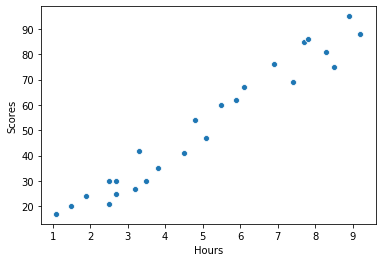

In [6]:
sns.scatterplot(x = raw_data['Hours'], y = raw_data['Scores']);

### From the above graph we can see a positive linear relation between the number of hours studied and the percentage of score

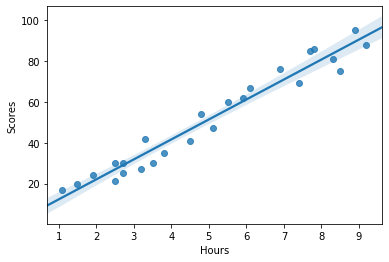

In [7]:
sns.regplot(x = raw_data['Hours'], y = raw_data['Scores']);

## Preparing the data
We divide the data into "attributes"(inputs) and "labels"(outputs).

In [8]:
x = raw_data.iloc[:, :-1].values  
y = raw_data.iloc[:, 1].values 

## Training the Algorithm
We split our data into training and test sets using scikit-Learn's built-in train_test_split() method in order to train our algorithm.

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making predictions

In [11]:
print(x_test)
y_pred = regressor.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211553
Testing score: 0.9454906892105356


In [14]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
